In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
from numpy.lib.arraysetops import setxor1d
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/UCI Conference/Dataset2/ocCovidCount.csv', index_col='date', parse_dates=True)
#df = pd.read_csv('/content/drive/MyDrive/UCI Conference/ocCovidCountDataset/ocCovidCount.csv')
#df["date"] = pd.to_datetime(df["date"])
df.sort_values(by='date', ascending = True, inplace = True)
N = 3186989
df['Infective'] = df['Infective'].div(N)
df.head(60)

Mounted at /content/drive


,Infective
date,
2020-01-22,3.137758e-07
2020-01-23,0.000000e+00
2020-01-24,0.000000e+00
2020-01-25,0.000000e+00
2020-01-26,0.000000e+00
2020-01-27,0.000000e+00
2020-01-28,0.000000e+00
2020-01-29,0.000000e+00
2020-01-30,0.000000e+00


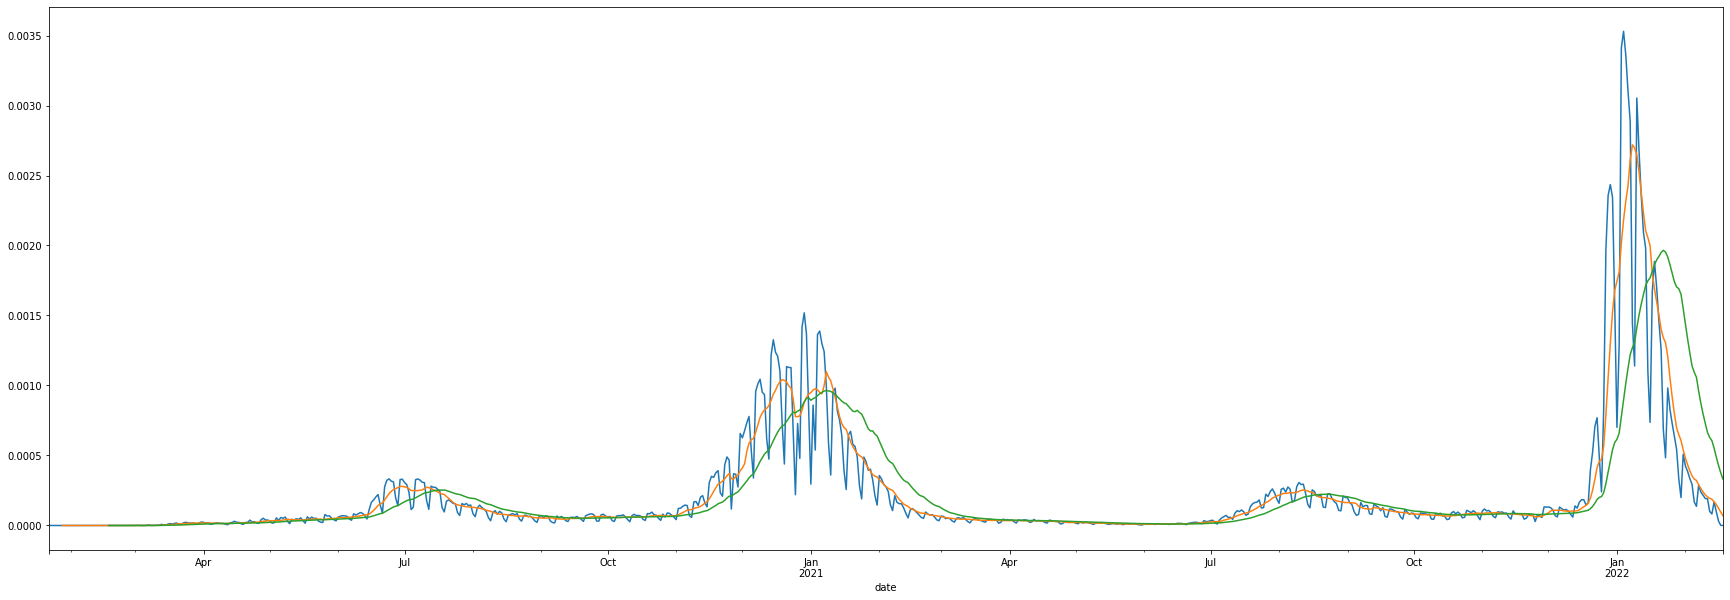

In [ ]:
df['Infective'].plot(figsize=(30,10))
df['Infective'].rolling(window=7).mean().plot(figsize=(30,10))
df['Infective'].rolling(window=28).mean().plot(figsize=(30,10))

In [ ]:
df['7-day Avg'] = df['Infective'].rolling(window=7).mean()
df['28-day Avg'] = df['Infective'].rolling(window=28).mean()
df.head(60)

,Infective,7-day Avg,28-day Avg
date,,,
2020-01-22,3.137758e-07,NaN,NaN
2020-01-23,0.000000e+00,NaN,NaN
2020-01-24,0.000000e+00,NaN,NaN
2020-01-25,0.000000e+00,NaN,NaN
2020-01-26,0.000000e+00,NaN,NaN
2020-01-27,0.000000e+00,NaN,NaN
2020-01-28,0.000000e+00,4.482511e-08,NaN
2020-01-29,0.000000e+00,0.000000e+00,NaN
2020-01-30,0.000000e+00,0.000000e+00,NaN


In [ ]:
df.to_csv('/content/drive/MyDrive/UCI Conference/Dataset2/oc_covid_countAveraged.csv')

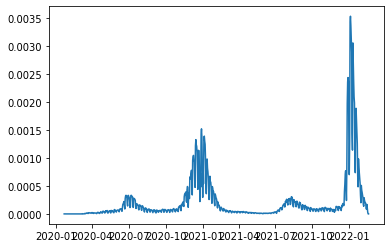

In [ ]:

plt.plot(df['Infective'])

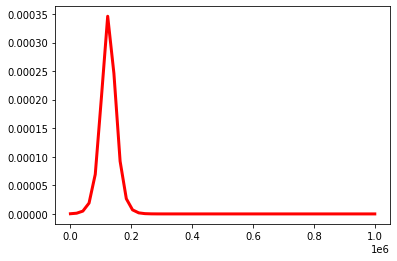

In [ ]:
S = None
I = None
R = None
def odes(x, t):
  #constants
  a = 1/389.5
  k = 1/400
  #a = 1/13.
  #k = 1/14

  #assign each ODE to a vector element
  S = x[0]
  I = x[1]
  R = x[2]

  #define each ODE
  dSdt = -a*S*I
  dIdt = a*S*I - k*I
  dRdt = k*I

  return [dSdt, dIdt, dRdt]
#initial conditions

I0 = 1/N
S0 = 1. - I0
R0 = 0.
x0 = [S0, I0, R0]

#declare a time vector (time window)
t = np.linspace(0, 1000000)
#t = matplotlib.dates.date2num(df['date'])
x = odeint(odes, x0, t)

S = x[:,0]
I = x[:,1]
R = x[:,2]


#plt.plot(t, S, 'g', lw=3, label='Suseptible')
plt.plot(t, I, 'r', lw=3, label='Infective')
#plt.plot(t, R, 'b', lw=3, label='Removed')
plt.show()